## --------------------------------------------------
# First we recall matrices from linear algebra 
# Then we do image processing 
## --------------------------------------------------

A is a $3\times 3$ matrix.
$A = \begin{pmatrix}1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9\end{pmatrix}$

B is a $3\times 2$ matrix 
$B =\begin{pmatrix}1 & 3  \\4 & -2  \\0 & 1\end{pmatrix}$

Then AB is a $3\times 2$ matrix: $ AB= \begin{pmatrix}1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9\end{pmatrix}$$\begin{pmatrix}1 & 3  \\4 & -2  \\0 & 1\end{pmatrix}$$= \begin{pmatrix}9 & 2  \\24 & 8  \\39 & 14 \end{pmatrix}$

In [9]:
import numpy as np
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[1,3],[4,-2],[0,1]])
product = np.dot(A,B) 
print('product=', product)

product= [[ 9  2]
 [24  8]
 [39 14]]


## Let's call the first column of $A$

In [2]:
print(A[:,0])

[1 4 7]


# Let's visualize A and B. I will visualize A in color and B in greyscale

$A = \begin{pmatrix}1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9\end{pmatrix}$ and $B =\begin{pmatrix} 1 & 3\\4&-2\\0 & 1\end{pmatrix}$

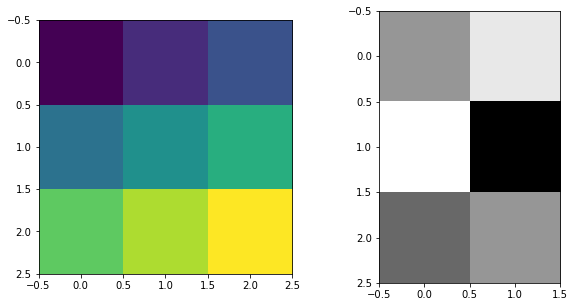

In [19]:
from matplotlib import pyplot as plt
# This is for controlling the color map since I want grey scale
import matplotlib.cm as cm
# split the figure into 2 subplots
fig, ax=plt.subplots(nrows = 1, ncols=2, figsize=(10,5))
ax[0].imshow(A)
ax[1].imshow(B, cmap=cm.Greys_r)

## ------------------------------------------------------

# Now we are ready for image processing

## ----------------------------------------------------

## We already imported the appropriate python tools (pyplot from matplotlib). We can read the image file we want to process

In [11]:
Hala = plt.imread("Hala.png")

# How are images saved in our computers? Matrices with red green blue intensity values for each pixel location. Let's print that.

In [5]:
print('Type of the image : ' , type(Hala))
print('Shape of the image : {}'.format(Hala.shape))
print('Image Hight {}'.format(Hala.shape[0]))
print('Image Width {}'.format(Hala.shape[1]))
print('Dimension of Image {}'.format(Hala.ndim))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (1500, 1500, 3)
Image Hight 1500
Image Width 1500
Dimension of Image 3


# Think of it as three flat layers stacked on top of each other, one red, one green and one blue. 
<img src="rgb_channels.jpg" width="400"/>

# Let's display the image we are working with.

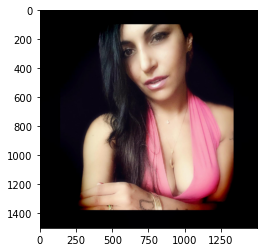

In [6]:
Halaplot = plt.imshow(Hala)

# Let's split the image into its three red green and blue layers (matrices)

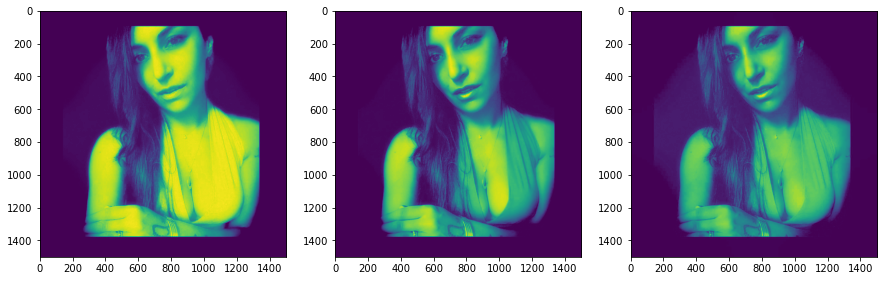

In [15]:
# split the figure into 3 subplots
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):
    # display each layer
    ax.imshow(Hala[:,:,c])

# Can I actually see a red tint, green tint, blue tint?

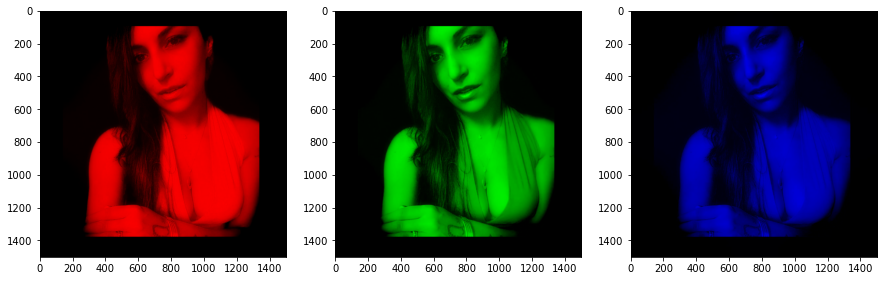

In [16]:
# Define new zero channel
z=np.zeros(np.shape(Hala[:,:,0]))
# red channel stays, others zero
red_tint=np.dstack((Hala[:,:,0],z,z))
# green channel stays, others zero
green_tint=np.dstack((z,Hala[:,:,1],z))
# blue channel stays, others zero
blue_tint=np.dstack((z,z,Hala[:,:,2]))
# split the figure into 3 subplots
fig, axs=plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
axs[0].imshow(red_tint)
axs[1].imshow(green_tint)
axs[2].imshow(blue_tint)

# Now let's apply filters to this image: This is just a linear combination of the above three matrices

filtered image r$=w_1\times$ red layer$+w_2\times$ green layer$+ w_3\times$blue layer

filtered image g$=w_4\times$ red layer$+w_5\times$ green layer$+ w_6\times$blue layer

filtered image b$=w_7\times$ red layer$+w_8\times$ green layer$+ w_9\times$blue layer

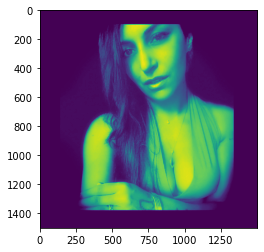

In [17]:
r, g, b = Hala[:,:,0], Hala[:,:,1], Hala[:,:,2]
gray_Hala = 0.29839*r + 0.58745*g + 0.11406*b
plt.imshow(gray_Hala)

# Why is it not grey?!!

# Did I not choose the right parameters in my linear combination to get a true grey scale?
$$\text{new image}=w_1r+w_2g+w_3b$$

# I actually did, but I have to stack three of those on top of each other to see the grey that I created. Grey is the right mix of red, green and blue at each pixel. Grey scale image is not a black or white image.

# How do I recover my original image? 

## Stack the red, green and blue channels on top of each other. This means layer the three 2 by 2 matrices along a third axis.

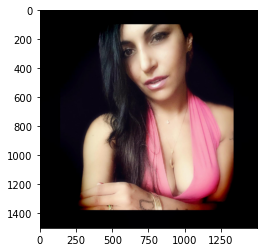

In [15]:
recovered_image=np.dstack((r,g,b))
plt.imshow(recovered_image)

# Compare the above gray scale to a built in function in skimage

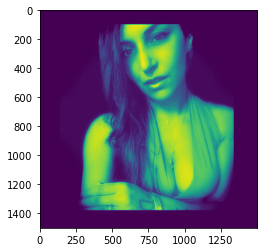

In [16]:
from skimage import io
img=io.imread('Hala.png', as_gray=True)
plt.imshow(img)

# What?!! The built in function also does not show me my greyscale image?!

# Okay let's fix it for everyone :). Define the new red, green and blue channels all similar linear combination of the original image channels, then stack these on top of each other to see your grey. Voila!

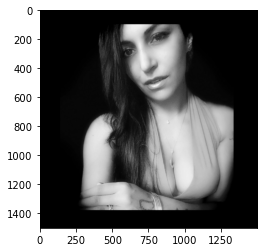

In [17]:
r1=0.2989*r+0.5870*g+0.1140*b
g1=0.2989*r+0.5870*g+0.1140*b
b1=0.2989*r+0.5870*g+0.1140*b
maybe_grey=np.dstack((r1,g1,b1))
plt.imshow(maybe_grey)

# Note that the above linear combination is not unique. We have many solutions. Many sets of parameters give sort of similar results. 

# Now let's convert the original image to black and white image: each pixel is pure binary either black (rgb values 0) or white (rgb values 255). Try to code it yourself but I will pull a built in convert method from Image in PIL. For your code you can go over each pixel and set rgb values to zero if below a threshold and to 255 if above a certain threshold. The higher the threshold the darker your image will be.

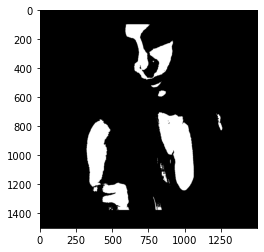

In [18]:
from PIL import Image
color_img = Image.open('Hala.png')
thresh = 200
fn = lambda x : 255 if x > thresh else 0 
black_white = color_img.convert('L').point(fn, mode='1')
plt.imshow(black_white)
black_white.save('bw_image.png')

# That was too dark. Let's play with the threshold to make it lighter

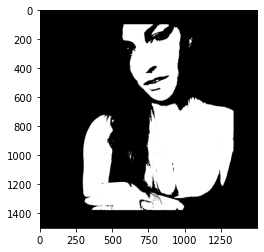

In [19]:
thresh = 110
fn = lambda x : 255 if x > thresh else 0
black_white1 = color_img.convert('L').point(fn, mode='1')
plt.imshow(black_white1)
black_white1.save('bw_image1.png')

# Let's try to extract some features by subtracting the above two images. 

## Note that a subtraction is a linear combination.

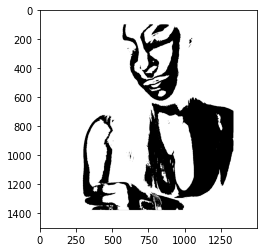

In [18]:
# we cannot immediately subtract two images we have to read them as matrices first
image = plt.imread('bw_image.png')
image1 = plt.imread('bw_image1.png')
features=image-image1
plt.imshow(features, cmap=cm.Greys_r)

# Moral of the story

## By linearly combining images (represented as matrices of numbers) you can unveil information (features) you did not see before. Different linear combinations reveal (or extract) different features. 

## Note that when we converted from color image to black and white image we applied a nonlinear thresholding function to the image

$$f(x)=\left\{\begin{aligned}&0 \text{ if } x<\text{threshold}\\&255 \text{ if } x>\text{threshold}\end{aligned}\right.$$

## Running an image (which could be made up of a linear combination of bunch of images) through a nonlinear function is very important to extract more features from the image. 

## Without putting in that nonlinear factor in the mix we won't be able to extract much. 

# This is a very important idea in Neural Networks. 
## - A linear combination step
## - Then composition with a nonlinear function 
## - This process is repeated over various layers
## - Note that the nonlinear function you compose with is an easy function. This is enough over multiple compositions and tremendously simplifies the computation. There are a bunch of popular nonlinear functions used for this nonlinear step. 

![image](neuralnetwork.png) 

# In a neural network, you are running an optimization problem searching for those special linear combination parameters that accomplish something you are looking for (depends on your goal). Details on this later.

# This is an example from: https://developer.nvidia.com/discover/convolutional-neural-network

![image](CNN.png)